## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [11]:
data = pd.read_csv(PATH+'Windowed_IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Prediction
1986-03,7.209340,-1.277433,-4.327074,0.744988,-0.531027,1.004126,-0.851989,0.255075,0.567930,0.358221,0.249011,-0.825895,-0.529244,-0.904615,0.108156,6.893940,-1.709273,-4.122886,0.839108,-0.084579,0.662230,-0.702346,0.412531,0.417298,0.335329,0.320465,-0.796355,-0.511677,-0.911772,0.053614,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,15.921562
1986-06,6.893940,-1.709273,-4.122886,0.839108,-0.084579,0.662230,-0.702346,0.412531,0.417298,0.335329,0.320465,-0.796355,-0.511677,-0.911772,0.053614,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,14.741072
1986-09,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,13.267827
1986-12,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,16.734827
1987-03,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,18.234604
1987-06,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,7.198027,-0.659948,-4.445436,0.929271,-0.476685,0.859010,-0.458682,0.259011,0.669047,0.543142,0.410577,-0.547864,-0.410874,-0.329028,0.352228,17.033018
1987-09,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,7.1

## 2.1 No scaled y dataset evaluation

In [3]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
svr = GridSearchCV(SVR(), n_jobs=-1, error_score=1, cv=cv,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'Windowed_IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,svr,scaling=False))

{'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}


In [4]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
#Params={'C': 7, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_PCA_dataset.csv', PATH, svr, cv=cv, scaling=False)

NSC
neg_mean_absolute_percentage_error
	mean: 0.4927261483426265	 std:0.07166495765129698


NSC
neg_root_mean_squared_error
	mean: 20.041840086198913	 std:5.3646697674800246


GL
neg_mean_absolute_percentage_error
	mean: 0.3175625597354155	 std:0.060383857755967045


GL
neg_root_mean_squared_error
	mean: 9.263120674518731	 std:2.680816990057375


PEP
neg_mean_absolute_percentage_error
	mean: 0.13325305642949972	 std:0.021454942097396817


PEP
neg_root_mean_squared_error
	mean: 6.498863952930857	 std:1.7139037215004973


BDX
neg_mean_absolute_percentage_error
	mean: 0.21344256388713673	 std:0.05987387422932958


BDX
neg_root_mean_squared_error
	mean: 9.919549618358069	 std:2.8878078808304584


IBM
neg_mean_absolute_percentage_error
	mean: 0.3914604045363349	 std:0.09843315121653967


IBM
neg_root_mean_squared_error
	mean: 15.948990737732496	 std:3.665309365142865


MEAN MAPE: 0.3096889465862026
	 STD: 0.06236215659010602
MEAN RMSE: 12.334473013947813
	 STD: 3.2625015450022437


## 2.2 Scaled y dataset evaluation

In [5]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
svr = GridSearchCV(SVR(), n_jobs=-1, error_score=1, cv=cv,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'Windowed_IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,svr,scaling=True))

{'C': 7, 'epsilon': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}


In [7]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
#Params={'C': 7, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Params={'C': 7, 'epsilon': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_PCA_dataset.csv', PATH, svr, cv=cv, scaling=True)

NSC
neg_mean_absolute_percentage_error
	mean: 0.5039452610537855	 std:0.2441259872550708


NSC
neg_root_mean_squared_error
	mean: 0.41368834557528655	 std:0.1066827719871849


GL
neg_mean_absolute_percentage_error
	mean: 18.663962159047607	 std:36.72819049638187


GL
neg_root_mean_squared_error
	mean: 0.1727633434561335	 std:0.04935053562053036


PEP
neg_mean_absolute_percentage_error
	mean: 0.3797593853938291	 std:0.1682498013297337


PEP
neg_root_mean_squared_error
	mean: 0.16014649316229929	 std:0.06153107947063332


BDX
neg_mean_absolute_percentage_error
	mean: 1.3457337787864723	 std:1.162538614913684


BDX
neg_root_mean_squared_error
	mean: 0.15094423935657797	 std:0.03328823561738228


IBM
neg_mean_absolute_percentage_error
	mean: 1.0796857283957455	 std:0.6667811177081523


IBM
neg_root_mean_squared_error
	mean: 0.2542995622319045	 std:0.04352412255991812


MEAN MAPE: 4.394617262535488
	 STD: 7.793977203517703
MEAN RMSE: 0.23036839675644036
	 STD: 0.05887534905112979


## 3.0 Model testing settings

In [9]:
from lib.fundamental_lib import make_dict
datas = make_dict('Windowed_{}_PCA_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

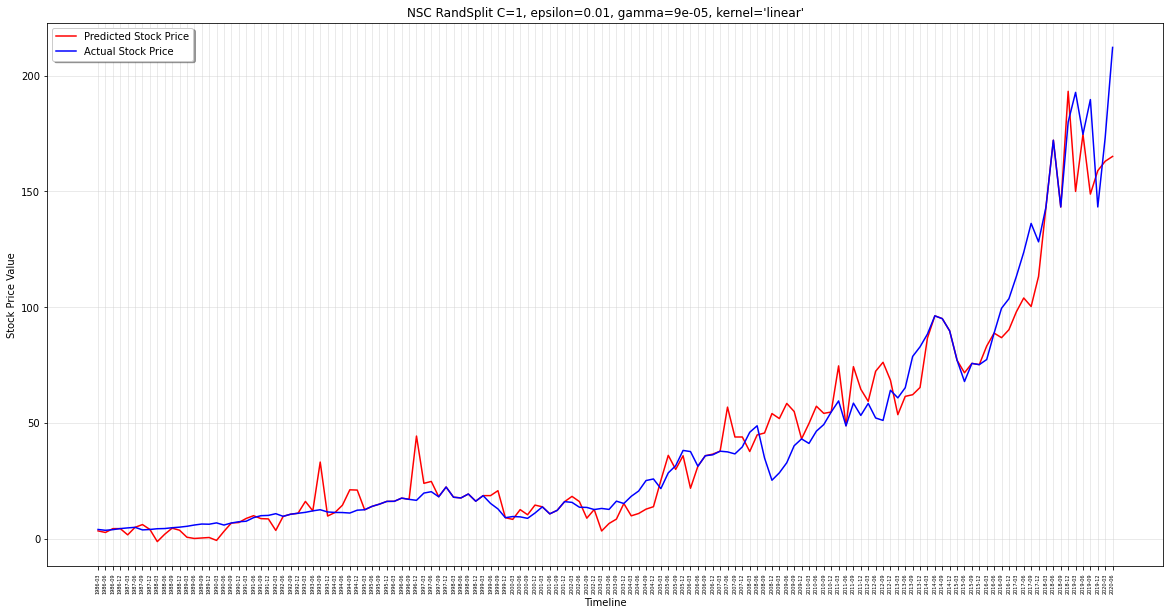

NSC MODEL RESULTS
 RMSE
 	Test: 15.228457451691058
 MAPE
 	Test: 0.45604699397449183
 MAE
 	Test: 10.560506536010042
 R2 Score Adj
 	Test: 1.0606887530630635



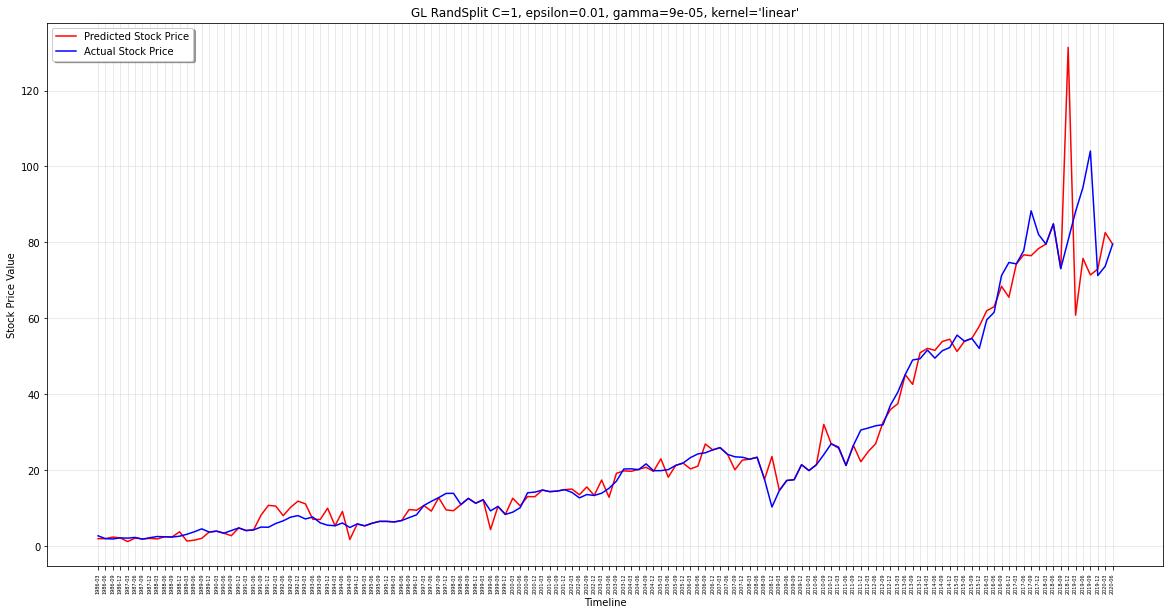

GL MODEL RESULTS
 RMSE
 	Test: 13.060822269671037
 MAPE
 	Test: 0.3401495841155116
 MAE
 	Test: 6.69431625543524
 R2 Score Adj
 	Test: 1.1665184899535996



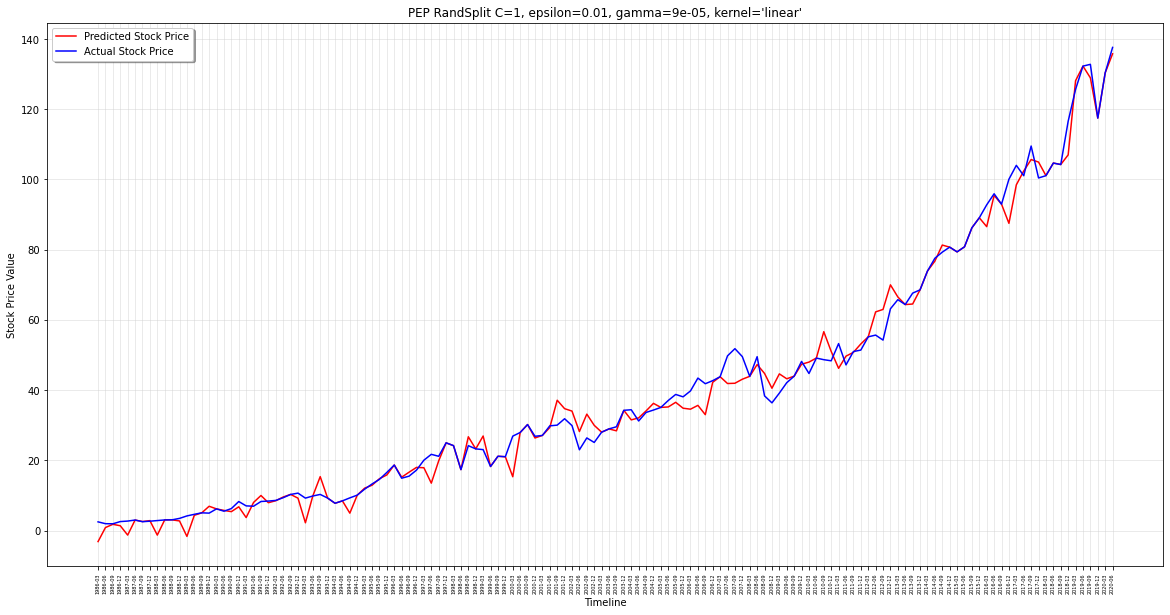

PEP MODEL RESULTS
 RMSE
 	Test: 5.706442557172388
 MAPE
 	Test: 0.38008460171080766
 MAE
 	Test: 4.568789127854513
 R2 Score Adj
 	Test: 1.0167042100702508



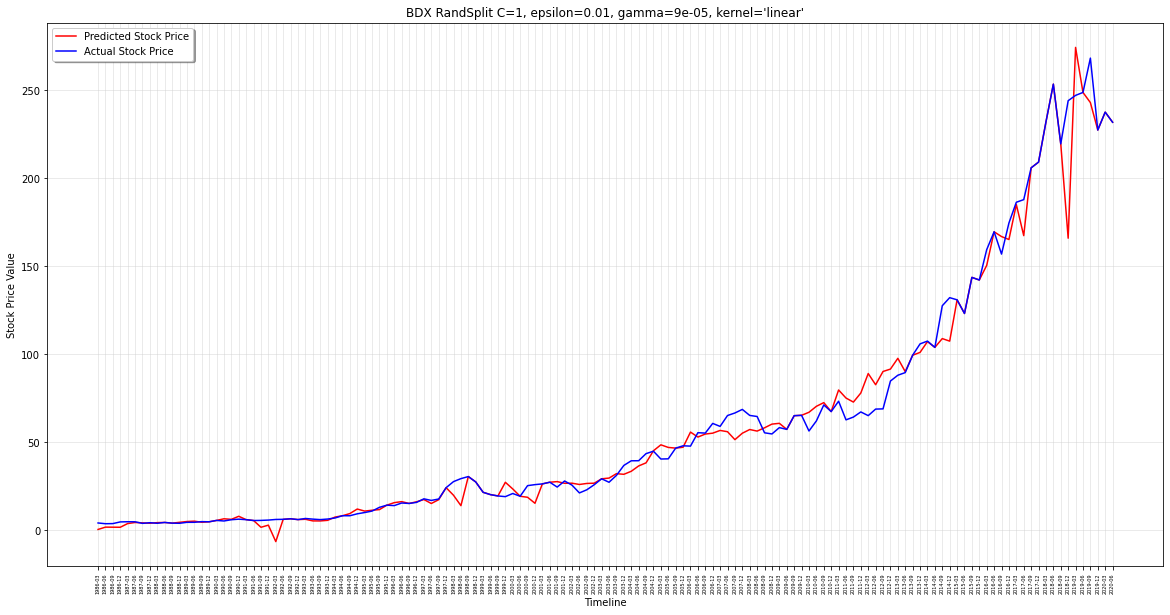

BDX MODEL RESULTS
 RMSE
 	Test: 17.417450343490106
 MAPE
 	Test: 0.2754957571592936
 MAE
 	Test: 8.761632604339514
 R2 Score Adj
 	Test: 1.038532281195745



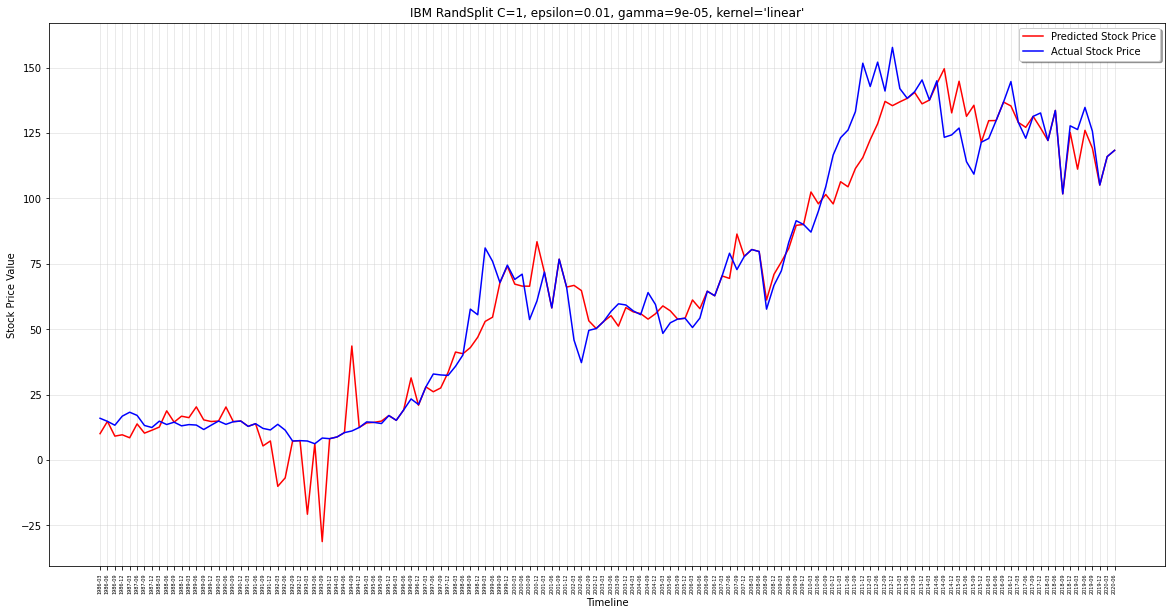

IBM MODEL RESULTS
 RMSE
 	Test: 16.83117126670494
 MAPE
 	Test: 0.6598442271659587
 MAE
 	Test: 12.645190826018181
 R2 Score Adj
 	Test: 1.077911184864759



In [10]:
from lib.fundamental_lib import model_results_revised
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs':[0, 1, 6, 8, 9]}
Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], svr, label=stock, scaling=False, start='1986-03')

## 3.2 Random split - Scaled prediction variable

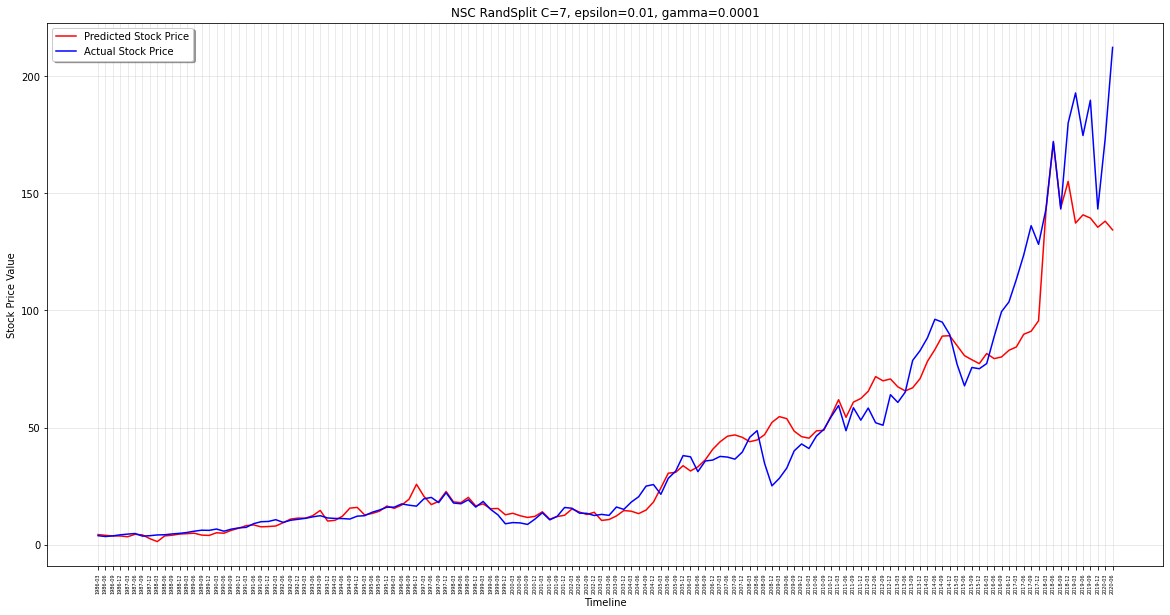

NSC MODEL RESULTS
 RMSE
 	Test: 16.255038646857223
 MAPE
 	Test: 0.2020100582729653
 MAE
 	Test: 8.48898162360299
 R2 Score Adj
 	Test: 1.0691468497102108



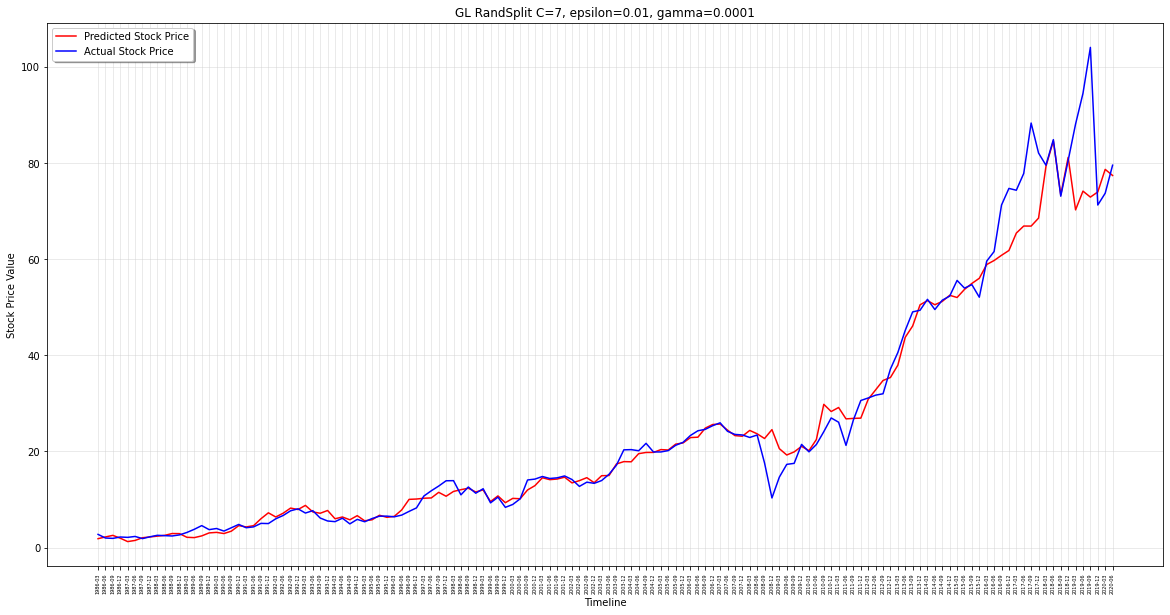

GL MODEL RESULTS
 RMSE
 	Test: 7.430239339861192
 MAPE
 	Test: 0.1817648548612952
 MAE
 	Test: 3.5310865136046012
 R2 Score Adj
 	Test: 1.0538923387790864



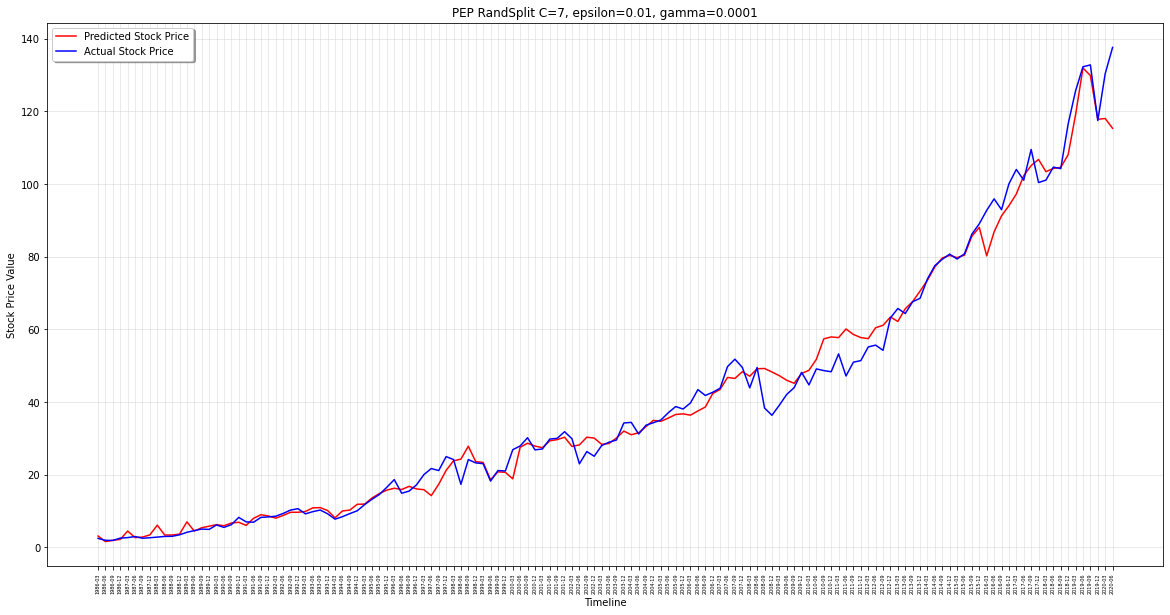

PEP MODEL RESULTS
 RMSE
 	Test: 4.829273034419515
 MAPE
 	Test: 0.17818724469287003
 MAE
 	Test: 3.5753474083316834
 R2 Score Adj
 	Test: 1.0119635085185132



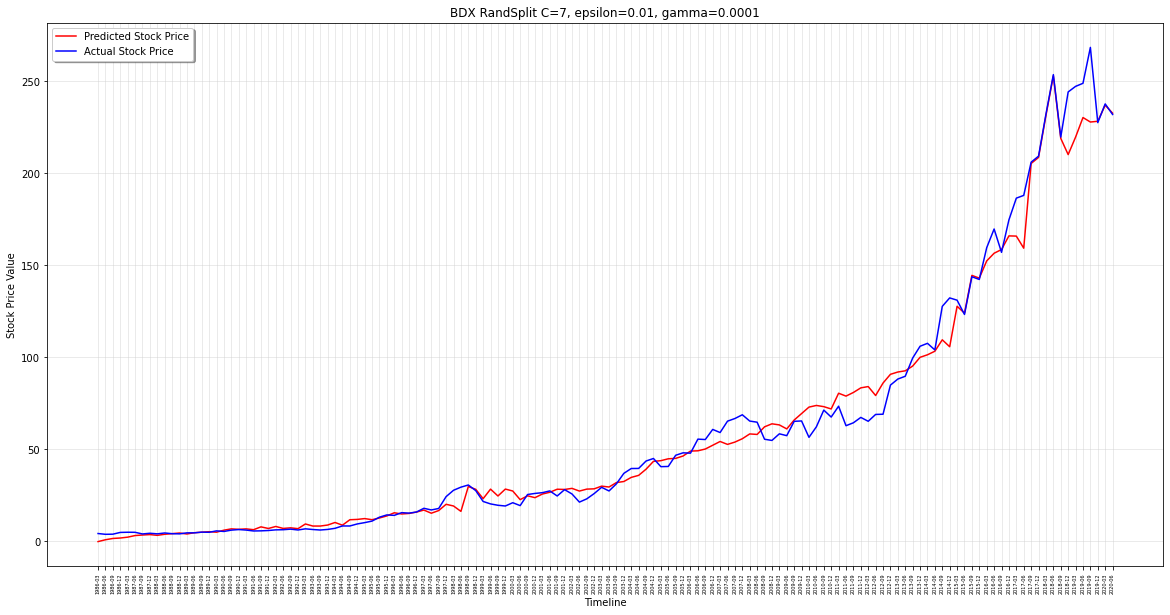

BDX MODEL RESULTS
 RMSE
 	Test: 12.31993439341419
 MAPE
 	Test: 0.2278611285826064
 MAE
 	Test: 7.001129949055281
 R2 Score Adj
 	Test: 1.0192784604617537



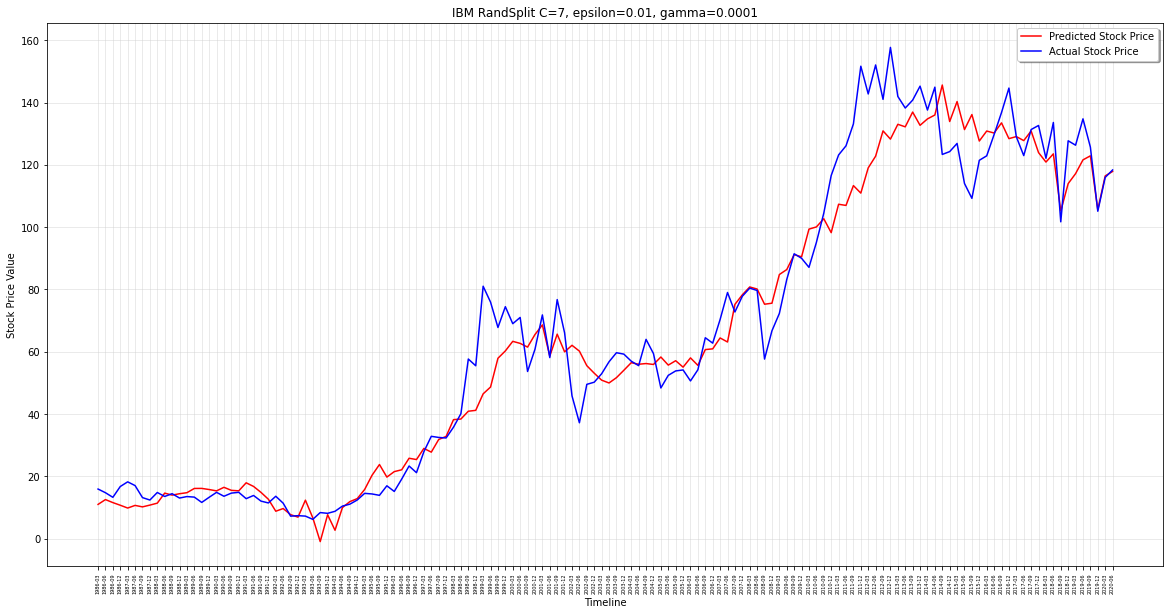

IBM MODEL RESULTS
 RMSE
 	Test: 12.157322383876
 MAPE
 	Test: 0.21706496893121074
 MAE
 	Test: 8.439952408448244
 R2 Score Adj
 	Test: 1.040648731496816



In [11]:
from lib.fundamental_lib import model_results_revised
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs':[0, 1, 6, 8, 9]}
Params={'C': 7, 'epsilon': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], svr, label=stock, scaling=True, start='1986-03')

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=False, manual=True)

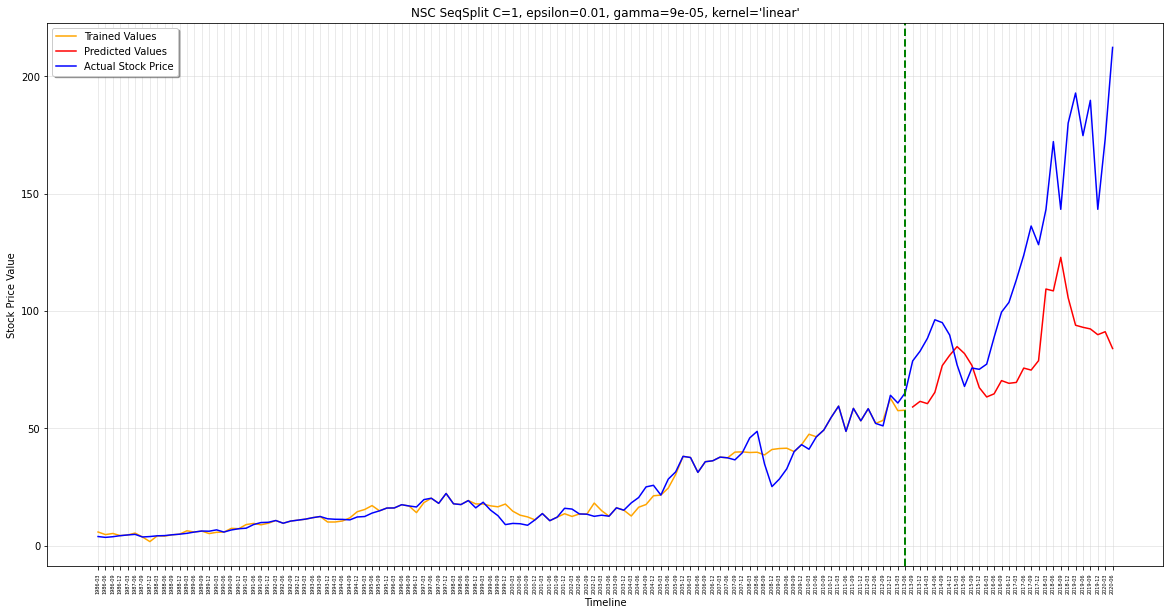

NSC MODEL RESULTS
 RMSE
 	Train: 3.234923755658355
 	Test: 59.28515100146944
 	Dataset: 27.231787556061324
 MAPE
 	Train: 0.10386634385176839
 	Test: 0.3202273400334967
 	Dataset: 0.149006407803352
 R2 Score Adj
 	Train: 0.9146483011830449
 	Test: 2.411638186672999
 	Dataset: 0.46991199114821935



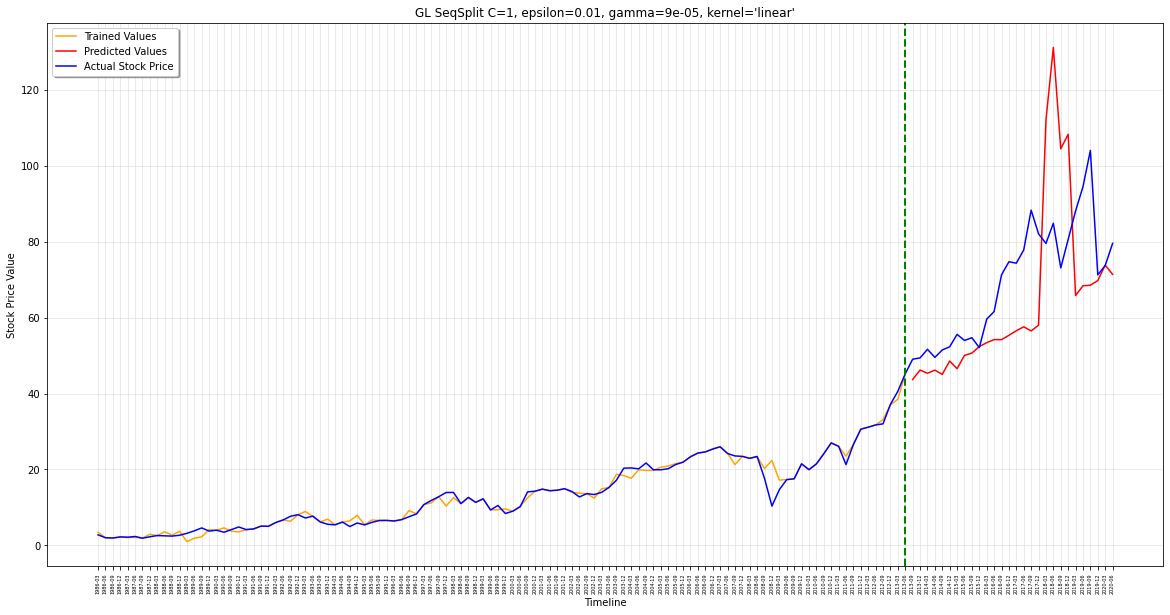

GL MODEL RESULTS
 RMSE
 	Train: 1.5146783817837737
 	Test: 19.691632706950557
 	Dataset: 9.094792219744285
 MAPE
 	Train: 0.0834407870857269
 	Test: 0.19658387224971474
 	Dataset: 0.10704617895447258
 R2 Score Adj
 	Train: 0.9424511749207789
 	Test: 2.362941428338724
 	Dataset: 0.7744643214850594



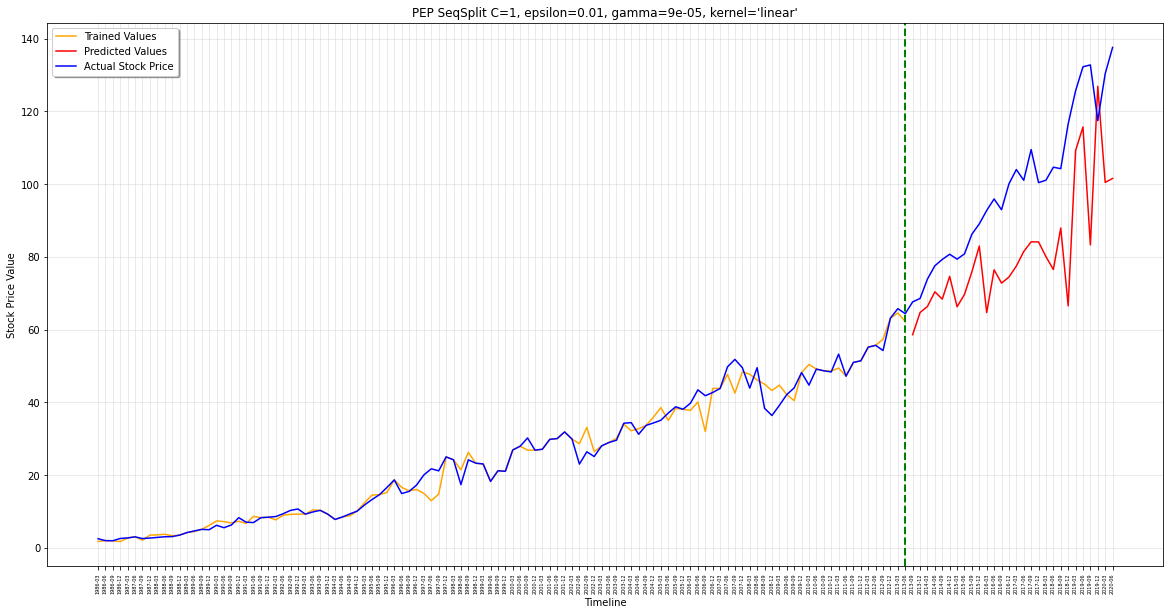

PEP MODEL RESULTS
 RMSE
 	Train: 2.5849506186392683
 	Test: 24.10755724615075
 	Dataset: 11.249003742300058
 MAPE
 	Train: 0.0715895576949994
 	Test: 0.1901835071941532
 	Dataset: 0.09633218025237682
 R2 Score Adj
 	Train: 0.9511711775738448
 	Test: 2.10948589834956
 	Dataset: 0.8250966404373999



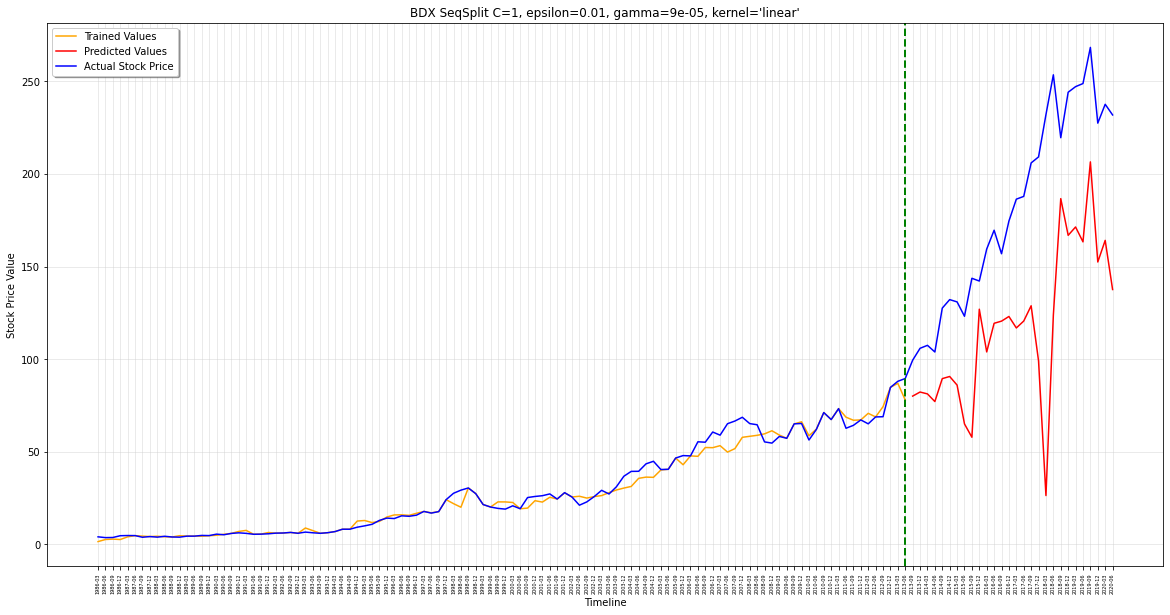

BDX MODEL RESULTS
 RMSE
 	Train: 3.9325018627306285
 	Test: 76.68087527868698
 	Dataset: 35.19931379836202
 MAPE
 	Train: 0.08731946766918998
 	Test: 0.34791939999894
 	Dataset: 0.14168923772359823
 R2 Score Adj
 	Train: 0.943037654020314
 	Test: 2.8113296872904416
 	Dataset: 0.5589016367928934



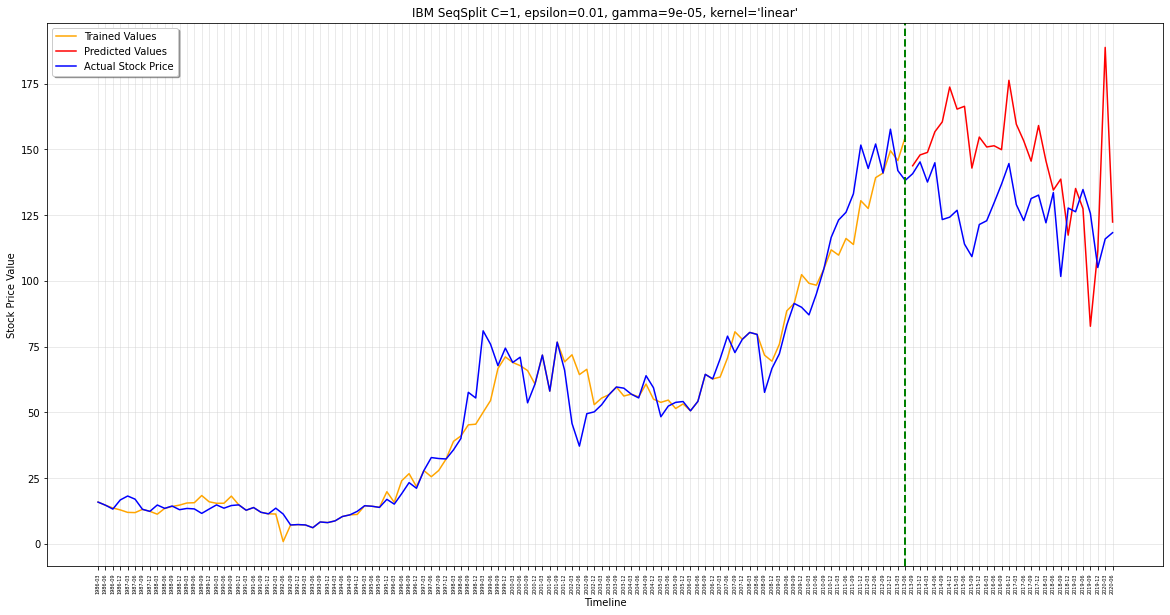

IBM MODEL RESULTS
 RMSE
 	Train: 7.789905646972362
 	Test: 29.712099583663573
 	Dataset: 15.238286287260054
 MAPE
 	Train: 0.0969139900782856
 	Test: 0.1986189470114893
 	Dataset: 0.11813300987010507
 R2 Score Adj
 	Train: 0.9134288222521537
 	Test: 7.48440167329178
 	Dataset: 0.8146453819773466



In [16]:
from lib.fundamental_lib import model_results_seq
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs':[0, 1, 6, 8, 9]}
Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, svr, label=stock, scaling=False, start='1986-03')

## 3.4 Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=True, manual=True)

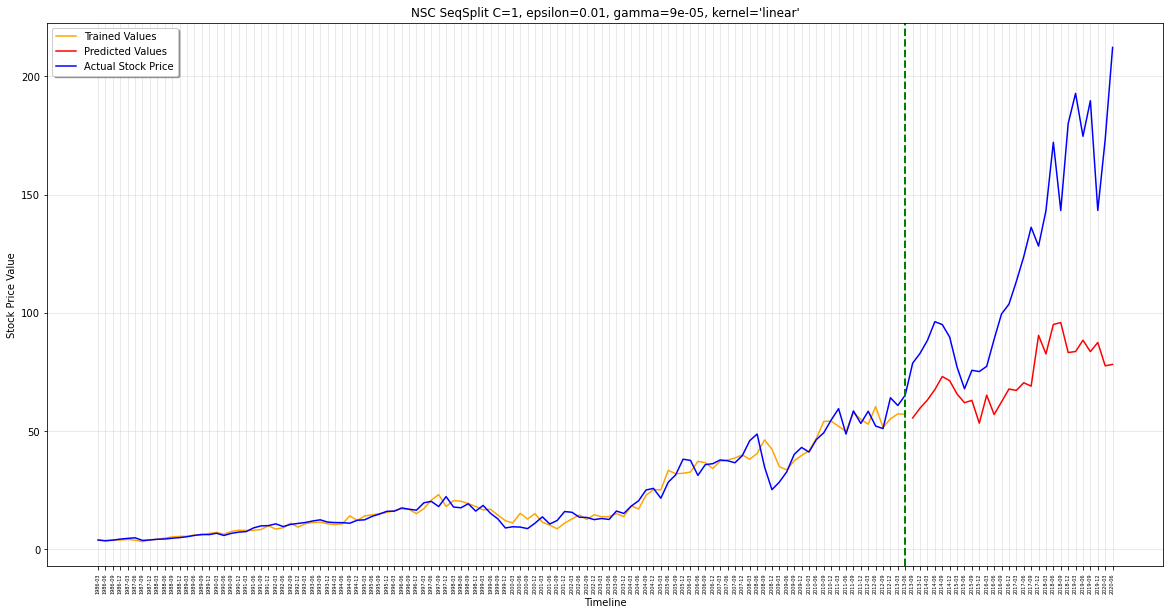

NSC MODEL RESULTS
 RMSE
 	Train: 3.4626365586500794
 	Test: 64.88188782338132
 	Dataset: 29.38137995339471
 MAPE
 	Train: 0.11129444127472217
 	Test: 0.36893339265848357
 	Dataset: 0.1635428999469535
 R2 Score Adj
 	Train: 0.9495938210294712
 	Test: -3.1618374980716117
 	Dataset: 0.6058963917220107



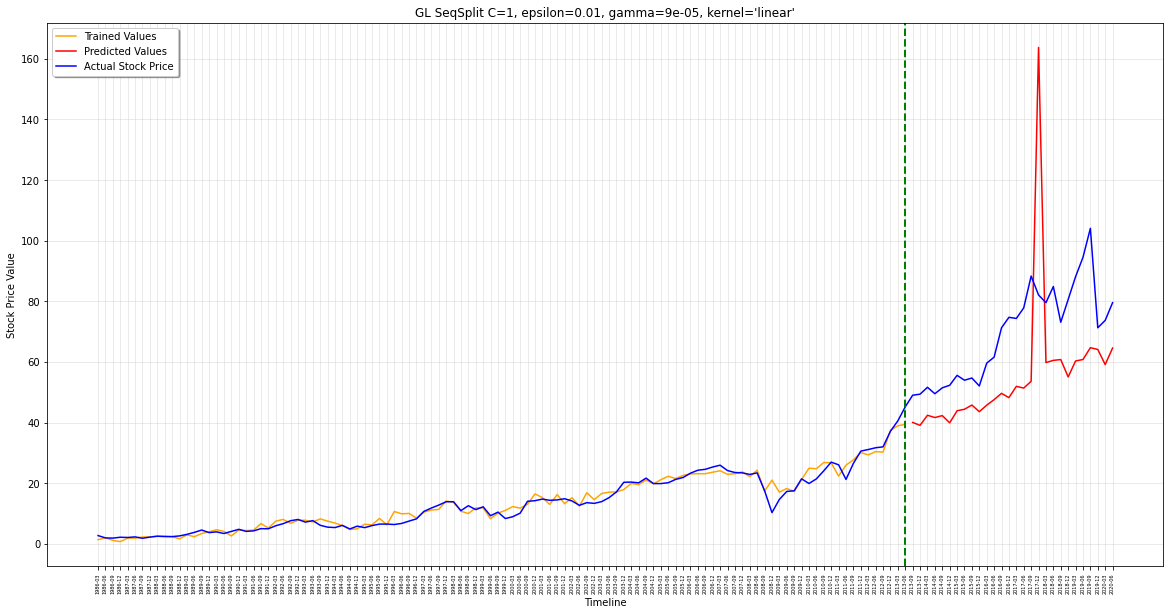

GL MODEL RESULTS
 RMSE
 	Train: 1.9199939584604104
 	Test: 24.95018561448338
 	Dataset: 11.3658450622409
 MAPE
 	Train: 0.14623630730245338
 	Test: 0.27076695121255945
 	Dataset: 0.17149077354995737
 R2 Score Adj
 	Train: 0.9527362229391767
 	Test: -4.386019571304004
 	Dataset: 0.7761484411992832



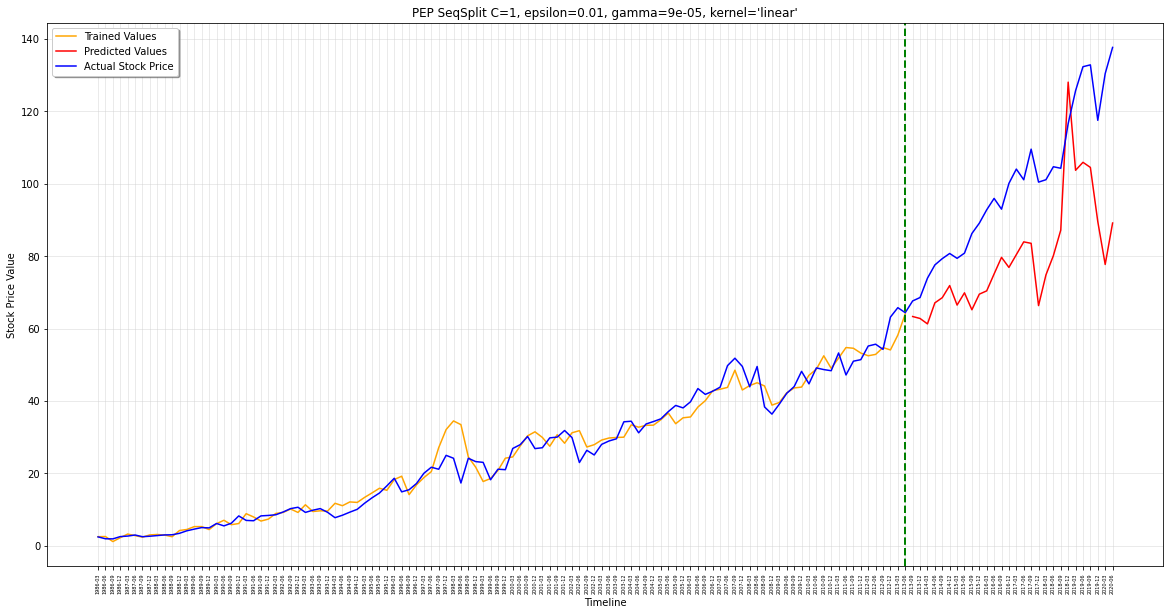

PEP MODEL RESULTS
 RMSE
 	Train: 3.3150566687266307
 	Test: 25.039690109189568
 	Dataset: 11.65812865786786
 MAPE
 	Train: 0.12395747400449786
 	Test: 0.20529469534868355
 	Dataset: 0.14045243497639565
 R2 Score Adj
 	Train: 0.9594955513166176
 	Test: -1.9463198978830931
 	Dataset: 0.881896210261401



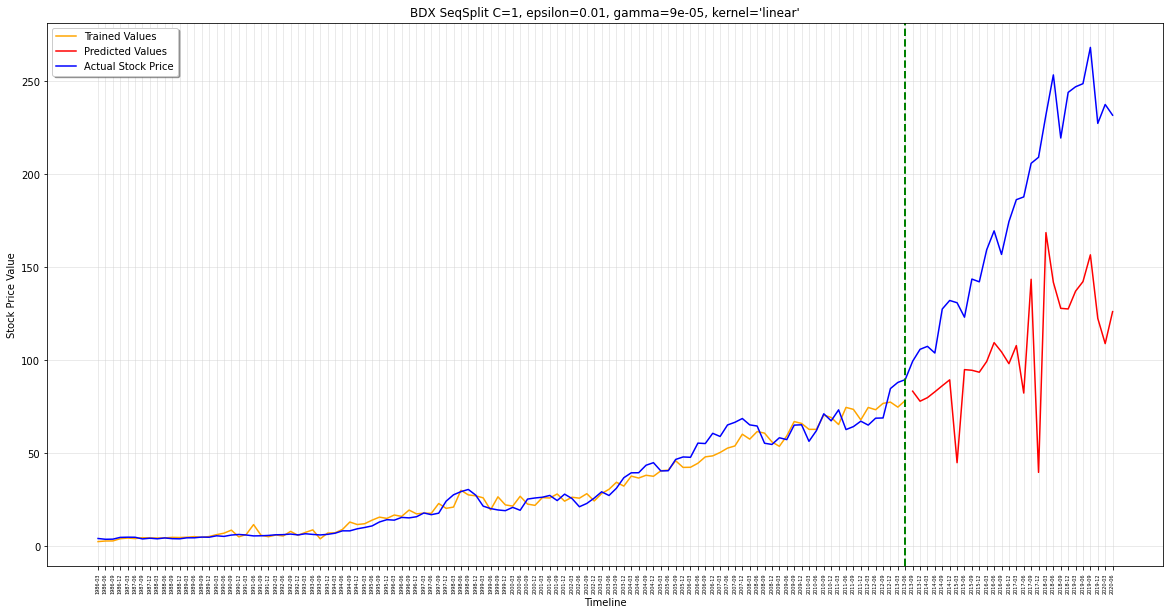

BDX MODEL RESULTS
 RMSE
 	Train: 4.652927538994448
 	Test: 84.00110382536045
 	Dataset: 38.05566842777944
 MAPE
 	Train: 0.1628697205487561
 	Test: 0.3929477403791027
 	Dataset: 0.20952889939546976
 R2 Score Adj
 	Train: 0.9589702487223324
 	Test: -4.3505693094379305
 	Dataset: 0.671354466763914



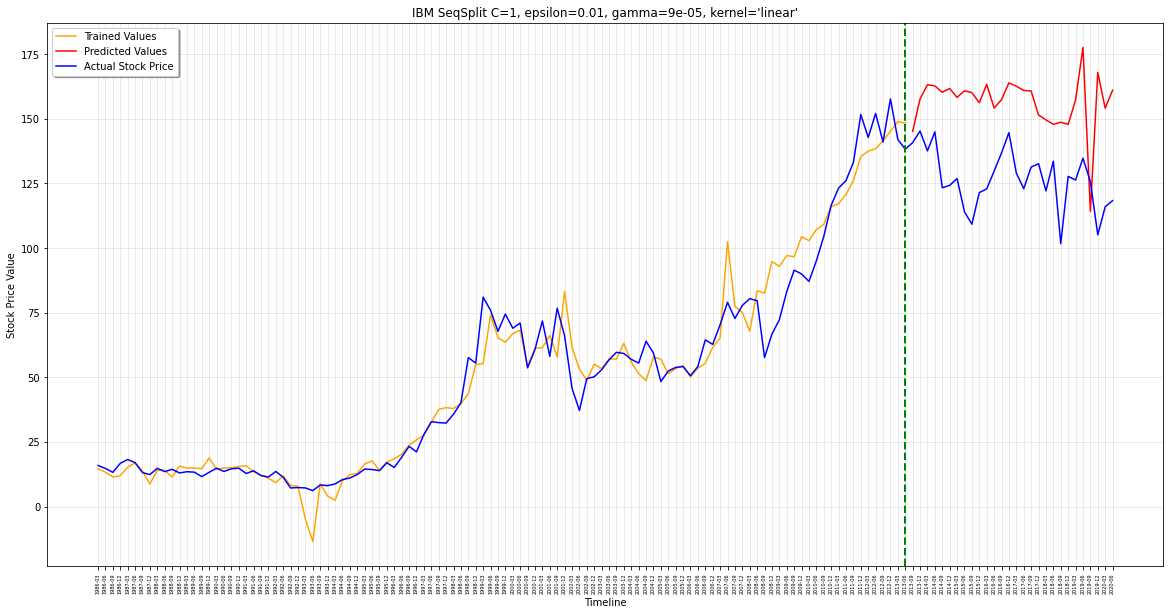

IBM MODEL RESULTS
 RMSE
 	Train: 8.383014965327284
 	Test: 33.5574517798581
 	Dataset: 16.863980251374738
 MAPE
 	Train: 0.1600395235136797
 	Test: 0.2535098317901145
 	Dataset: 0.17899504057673288
 R2 Score Adj
 	Train: 0.9476436176822518
 	Test: -19.360470085125158
 	Dataset: 0.8571969863562844



In [17]:
from lib.fundamental_lib import model_results_seq
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs':[0, 1, 6, 8, 9]}
Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, svr, label=stock, scaling=True, start='1986-03')